In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
inputs=df[['Pclass', 'Sex', 'Age', 'Fare']]
target=df['Survived']
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [3]:
from sklearn.preprocessing import LabelEncoder


In [4]:
le_sex=LabelEncoder()


In [5]:
inputs['Sex_n']=le_sex.fit_transform(inputs['Sex'])

inputs

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1
...,...,...,...,...,...
886,2,male,27.0,13.0000,1
887,1,female,19.0,30.0000,0
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [6]:
inputs_n=inputs.drop(['Sex'], axis='columns')
inputs_n

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [7]:
import math
Age_median=math.floor(inputs_n.Age.mean())
Age_median

29

In [8]:
inputs_n.Age=inputs.Age.fillna(Age_median)
inputs_n

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,29.0,23.4500,0
889,1,26.0,30.0000,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(inputs_n, target, test_size=0.2)
y_test

52     1
574    0
545    0
147    0
54     0
      ..
335    0
519    0
621    1
356    1
632    1
Name: Survived, Length: 179, dtype: int64

In [21]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
dtree.score(X_test, y_test)

0.8044692737430168

In [43]:
#decisiontree visualization

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
import pydotplus

labels=inputs_n.columns


dot_data=export_graphviz(dtree, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True, rounded=True)

pydot_graph=pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('":3,3!"')
pydot_graph.write_png('titanic_tree.png')



True

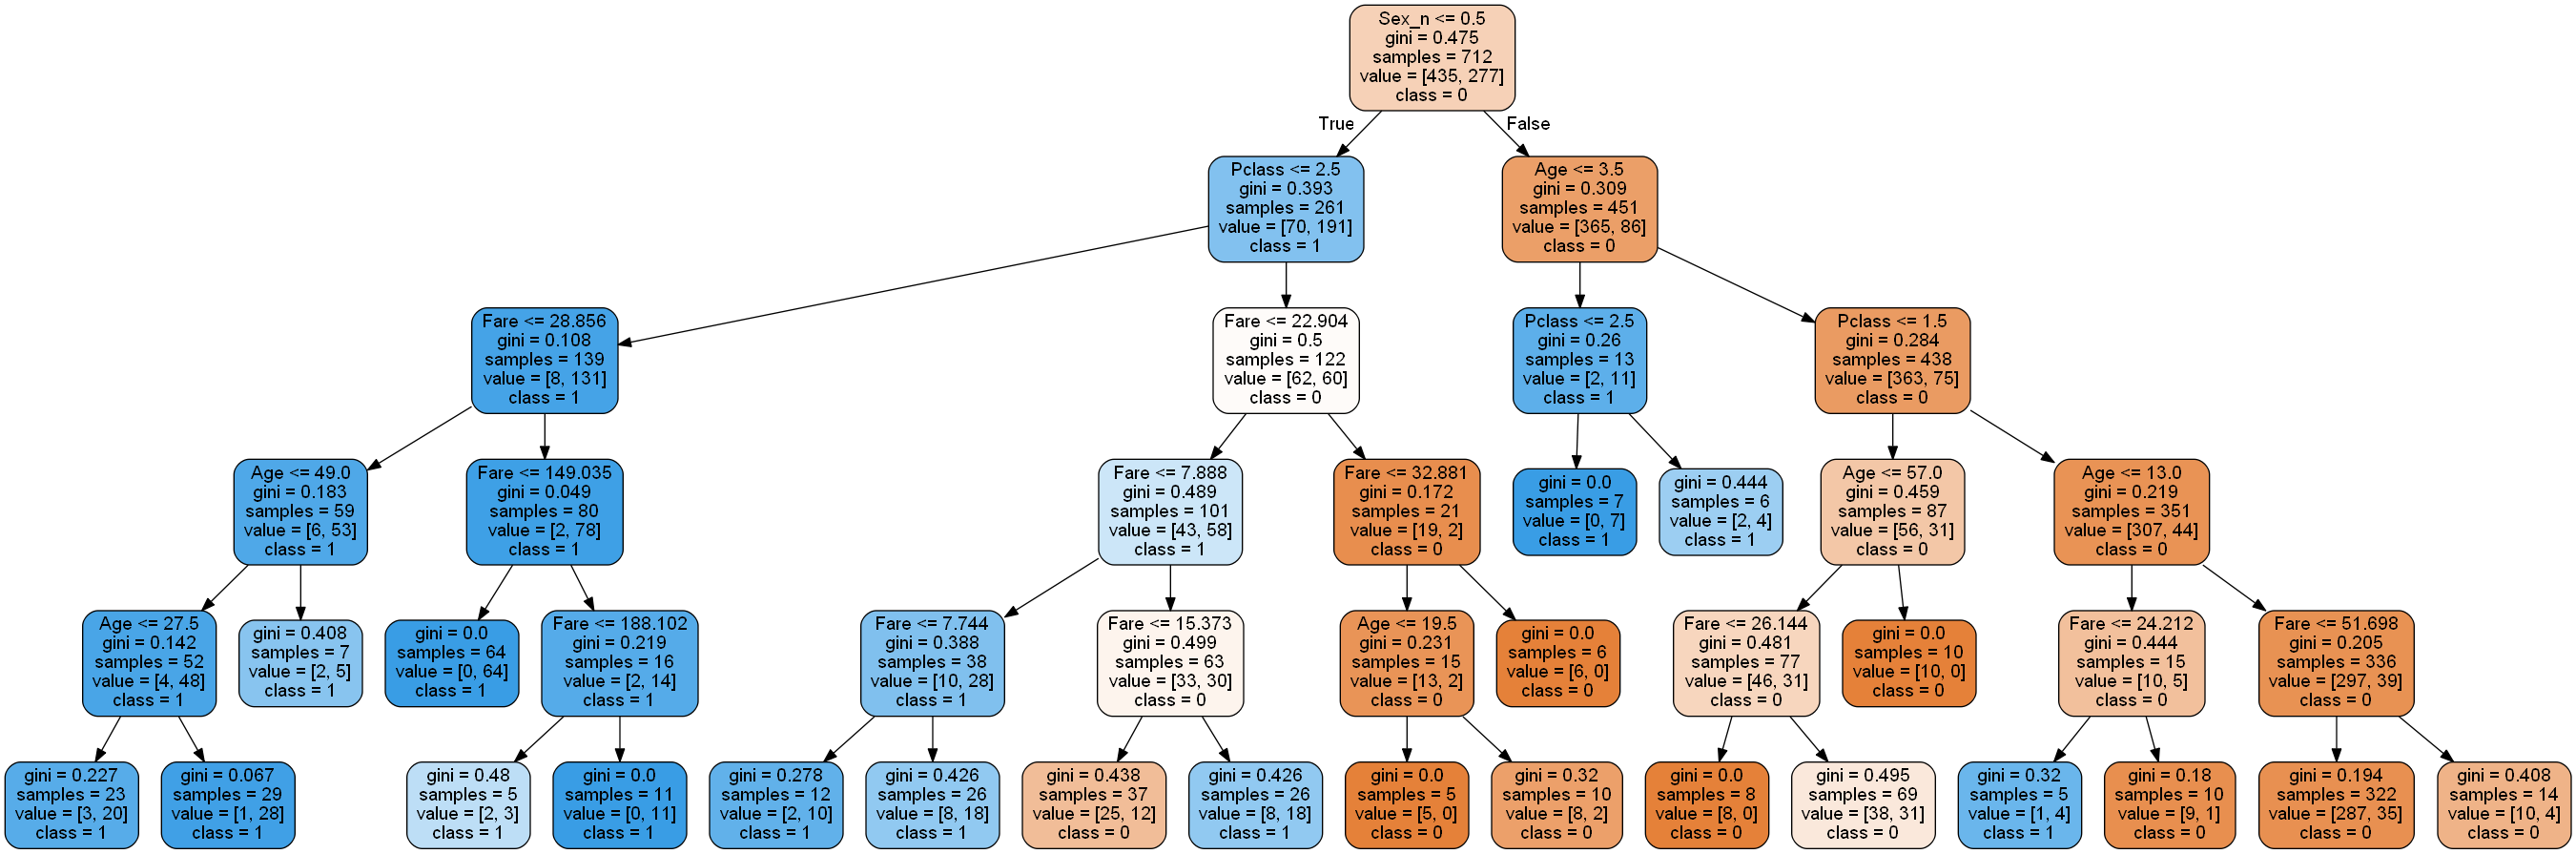

In [45]:
from IPython.display import Image
Image(filename='titanic_tree.png')